# Wizualizacje danych

W tej sekcji znajdą się wykresy obrazujące zależności między zmiennymi.

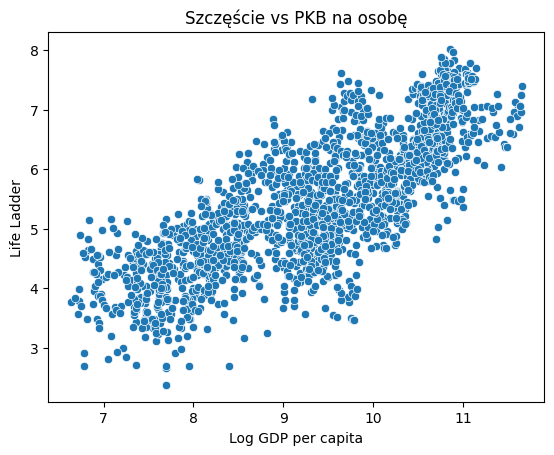

In [3]:
# Przykład wykresu
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/happiness_cleaned.csv')
sns.scatterplot(data=df, x='Log GDP per capita', y='Life Ladder')
plt.title('Szczęście vs PKB na osobę')
plt.show()